Cargo las librerías:

In [1]:
# Librerías generales:

import pandas as pd
import numpy as np

# Librería para medir tiempos:

import time

# Librerías para gráficos:

import seaborn as sns
import matplotlib.pyplot as plt

# Librerías generales para modelos:

import sklearn as sk
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Librería para regresión:

import statsmodels.api as sm

# Librerías para redes neuronales:

from tensorflow import keras
from tensorflow.keras import layers

# Librerías para PCA y KNN:

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor

# Librería para Random Forest:

from sklearn.ensemble import RandomForestRegressor

Cargo los datos:

In [2]:
X_train = pd.read_csv('X_train_ns.csv')
del X_train['Unnamed: 0']
y_train = pd.read_csv('log_y_train.csv')
del y_train['Unnamed: 0']

X_test = pd.read_csv('X_test_ns.csv')
del X_test['Unnamed: 0']
y_test = pd.read_csv('log_y_test.csv')
del y_test['Unnamed: 0']

y_train_original = pd.read_csv('y_train_original.csv')
del y_train_original['Unnamed: 0']
y_test_original = pd.read_csv('y_test_original.csv')
del y_test_original['Unnamed: 0']

Variables_regresión_Backwards = pd.read_csv('Variables_regresión_Backwards.csv')
del Variables_regresión_Backwards['Unnamed: 0']
Variables_regresión_Backwards = list(Variables_regresión_Backwards['0'])
Variables_regresión_Backwards.remove('Intercept')

Variables_Random_Forest = pd.read_csv('Variables_Random_Forest.csv')
del Variables_Random_Forest['Unnamed: 0']
Variables_Random_Forest = list(Variables_Random_Forest['0'])

Creo los DataFrames X_train_reg y X_test_reg con las variables seleccionadas por el algoritmo Backwards para la regresión.

In [3]:
X_train_reg = pd.DataFrame(data=np.matrix(X_train.loc[:,Variables_regresión_Backwards]),
                           columns=Variables_regresión_Backwards)
X_train_reg['Intercept'] = np.ones(X_train.shape[0])

In [4]:
X_test_reg = pd.DataFrame(data=np.matrix(X_test.loc[:,Variables_regresión_Backwards]),
                           columns=Variables_regresión_Backwards)
X_test_reg['Intercept'] = np.ones(X_test.shape[0])

# Entrenamiento de los modelos

### Regresión

In [5]:
modelo_reg = sm.OLS(y_train, X_train_reg)
Reg = modelo_reg.fit()
print(Reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     1262.
Date:                Thu, 02 Jun 2022   Prob (F-statistic):               0.00
Time:                        23:34:48   Log-Likelihood:                -7677.0
No. Observations:               13286   AIC:                         1.539e+04
Df Residuals:                   13267   BIC:                         1.553e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

### Red Neuronal

Epoch 1/1000
226/226 [==============================] - 1s 2ms/step - loss: 12.3849 - mean_squared_error: 12.3849 - val_loss: 7.0886 - val_mean_squared_error: 7.0886
Epoch 2/1000
226/226 [==============================] - 0s 2ms/step - loss: 2.7805 - mean_squared_error: 2.7805 - val_loss: 0.5043 - val_mean_squared_error: 0.5043
Epoch 3/1000
226/226 [==============================] - 0s 2ms/step - loss: 0.3055 - mean_squared_error: 0.3055 - val_loss: 0.1702 - val_mean_squared_error: 0.1702
Epoch 4/1000
226/226 [==============================] - 0s 2ms/step - loss: 0.2211 - mean_squared_error: 0.2211 - val_loss: 0.1606 - val_mean_squared_error: 0.1606
Epoch 5/1000
226/226 [==============================] - 0s 2ms/step - loss: 0.2030 - mean_squared_error: 0.2030 - val_loss: 0.1527 - val_mean_squared_error: 0.1527
Epoch 6/1000
226/226 [==============================] - 0s 2ms/step - loss: 0.1853 - mean_squared_error: 0.1853 - val_loss: 0.1449 - val_mean_squared_error: 0.1449
Epoch 7/1000
2

Epoch 51/1000
226/226 [==============================] - 0s 2ms/step - loss: 0.1113 - mean_squared_error: 0.1113 - val_loss: 0.1167 - val_mean_squared_error: 0.1167
Epoch 52/1000
226/226 [==============================] - 0s 2ms/step - loss: 0.1091 - mean_squared_error: 0.1091 - val_loss: 0.1106 - val_mean_squared_error: 0.1106
Epoch 53/1000
226/226 [==============================] - 0s 2ms/step - loss: 0.1096 - mean_squared_error: 0.1096 - val_loss: 0.1221 - val_mean_squared_error: 0.1221
Epoch 54/1000
226/226 [==============================] - 0s 2ms/step - loss: 0.1055 - mean_squared_error: 0.1055 - val_loss: 0.1166 - val_mean_squared_error: 0.1166
Epoch 55/1000
226/226 [==============================] - 0s 2ms/step - loss: 0.1066 - mean_squared_error: 0.1066 - val_loss: 0.1116 - val_mean_squared_error: 0.1116
Epoch 56/1000
226/226 [==============================] - 0s 2ms/step - loss: 0.1058 - mean_squared_error: 0.1058 - val_loss: 0.1246 - val_mean_squared_error: 0.1246
Epoch 57/1

226/226 [==============================] - 0s 2ms/step - loss: 0.0860 - mean_squared_error: 0.0860 - val_loss: 0.1134 - val_mean_squared_error: 0.1134
Epoch 150/1000
226/226 [==============================] - 0s 2ms/step - loss: 0.0893 - mean_squared_error: 0.0893 - val_loss: 0.1124 - val_mean_squared_error: 0.1124
Epoch 151/1000
226/226 [==============================] - 0s 2ms/step - loss: 0.0859 - mean_squared_error: 0.0859 - val_loss: 0.1156 - val_mean_squared_error: 0.1156
Epoch 152/1000
226/226 [==============================] - 0s 2ms/step - loss: 0.0859 - mean_squared_error: 0.0859 - val_loss: 0.1149 - val_mean_squared_error: 0.1149
Epoch 153/1000
226/226 [==============================] - 0s 2ms/step - loss: 0.0858 - mean_squared_error: 0.0858 - val_loss: 0.1171 - val_mean_squared_error: 0.1171
Epoch 154/1000
226/226 [==============================] - 0s 2ms/step - loss: 0.0845 - mean_squared_error: 0.0845 - val_loss: 0.1179 - val_mean_squared_error: 0.1179
Epoch 155/1000
226/

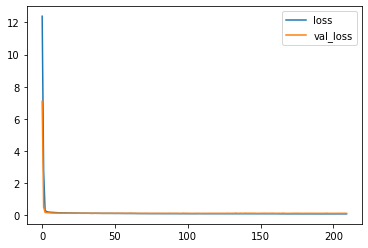

In [6]:
X_train_red_neuronal,X_val_red_neuronal,y_train_red_neuronal,y_val_red_neuronal=train_test_split(X_train,y_train,test_size=0.1,random_state=1809)# Uso la hora como semilla

ANN = keras.Sequential([
    
    layers.Dense(200,activation="relu",input_shape=[50]),
    layers.BatchNormalization(),
    layers.Dropout(1/5),
    
    layers.Dense(40,activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(1/10),
    
    layers.Dense(10,activation="relu"),
    layers.BatchNormalization(),
    
    layers.Dense(1)
])

ANN.compile(
    optimizer='adam',
    loss='MeanSquaredError',
    metrics=['MeanSquaredError'],
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=100,
    min_delta=0.0001,
    restore_best_weights=True,
)

history = ANN.fit(
    X_train_red_neuronal, y_train_red_neuronal,
    validation_data=(X_val_red_neuronal, y_val_red_neuronal),
    batch_size=53,
    epochs=1000,
    callbacks=[early_stopping],
)

# El siguiente código me permitirá emplear negrita al usar print:

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print(color.BOLD +
      "\nMínima suma de los cuadrados de los errores: {}".format(history_df['val_loss'].min())+
      color.END)

### KNN

In [7]:
PKNN = Pipeline([
    ('pca', PCA(n_components=30)), 
    ('knn', KNeighborsRegressor(n_neighbors=9)),
])

In [8]:
PKNN.fit(X_train,y_train)

Pipeline(steps=[('pca', PCA(n_components=30)),
                ('knn', KNeighborsRegressor(n_neighbors=9))])

### Random Forest con todas las variables

In [9]:
RF = RandomForestRegressor(n_estimators=1000, n_jobs=-1, bootstrap = True,
                           random_state = 100, criterion = 'squared_error',
                           ccp_alpha = 0, max_samples = 0.7, max_features=35)

In [10]:
RF.fit(X = X_train, y = y_train)

<ipython-input-10-0ffa38b0caa6>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(X = X_train, y = y_train)


RandomForestRegressor(ccp_alpha=0, max_features=35, max_samples=0.7,
                      n_estimators=1000, n_jobs=-1, random_state=100)

### Random Forest con selección de variables

In [11]:
RF_sel = RandomForestRegressor(n_estimators=1000, n_jobs=-1, bootstrap = True,
                               random_state = 100, criterion = 'squared_error',
                               ccp_alpha = 1e-5, max_samples = 0.9,
                               max_features=10)

In [12]:
RF_sel.fit(X = X_train.loc[:,Variables_Random_Forest], y = y_train)

<ipython-input-12-a10b88c20044>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_sel.fit(X = X_train.loc[:,Variables_Random_Forest], y = y_train)


RandomForestRegressor(ccp_alpha=1e-05, max_features=10, max_samples=0.9,
                      n_estimators=1000, n_jobs=-1, random_state=100)

# Predicciones

### Predicciones sobre train

Reg_Preds_train son las predicciones de la regresión, ANN_Preds_train son las predicciones de la red neuronal, PKNN_Preds_train son las predicciones de KNN (con PCA), RF_Preds_train son las predicciones del Random Forest con todas las variables y RF_sel_Preds_train son las predicciones del Random Forest con selección de variables.

In [13]:
Reg_Preds_train = Reg.predict(X_train_reg)
ANN_Preds_train = ANN.predict(X_train)
PKNN_Preds_train = PKNN.predict(X_train)
RF_Preds_train = RF.predict(X_train)
RF_sel_Preds_train = RF_sel.predict(X_train.loc[:,Variables_Random_Forest])

Pongo todas las predicciones en un DataFrame:

In [14]:
Predicciones_train = pd.DataFrame(data=[])
Predicciones_train['Reg_Preds_train'] = Reg_Preds_train
Predicciones_train['ANN_Preds_train'] = ANN_Preds_train
Predicciones_train['PKNN_Preds_train'] = PKNN_Preds_train
Predicciones_train['RF_Preds_train'] = RF_Preds_train
Predicciones_train['RF_sel_Preds_train'] = RF_sel_Preds_train
Predicciones_train.head()

,Reg_Preds_train,ANN_Preds_train,PKNN_Preds_train,RF_Preds_train,RF_sel_Preds_train
0,4.370131,4.161143,4.125745,4.103986,4.089591
1,4.950083,4.680677,4.830251,4.832328,4.858673
2,3.302924,3.354428,3.429278,3.427990,3.432473
3,4.370281,4.468367,4.287909,4.476609,4.523520
4,3.475786,3.250816,3.434390,3.134249,3.067106


### Predicciones sobre test

Reg_Preds_test son las predicciones de la regresión, ANN_Preds_test son las predicciones de la red neuronal, PKNN_Preds_test son las predicciones de KNN (con PCA), RF_Preds_test son las predicciones del Random Forest con todas las variables y RF_sel_Preds_test son las predicciones del Random Forest con selección de variables.

In [15]:
Reg_Preds_test = Reg.predict(X_test_reg)
ANN_Preds_test = ANN.predict(X_test)
PKNN_Preds_test = PKNN.predict(X_test)
RF_Preds_test = RF.predict(X_test)
RF_sel_Preds_test = RF_sel.predict(X_test.loc[:,Variables_Random_Forest])

Pongo todas las predicciones en un DataFrame:

In [16]:
Predicciones_test = pd.DataFrame(data=[])
Predicciones_test['Reg_Preds_test'] = Reg_Preds_test
Predicciones_test['ANN_Preds_test'] = ANN_Preds_test
Predicciones_test['PKNN_Preds_test'] = PKNN_Preds_test
Predicciones_test['RF_Preds_test'] = RF_Preds_test
Predicciones_test['RF_sel_Preds_test'] = RF_sel_Preds_test
Predicciones_test.head()

,Reg_Preds_test,ANN_Preds_test,PKNN_Preds_test,RF_Preds_test,RF_sel_Preds_test
0,3.364635,3.466795,3.762309,3.394575,3.302599
1,3.368552,2.837452,3.423251,2.888314,2.863041
2,3.288179,2.934854,3.170034,3.139355,3.176348
3,4.948480,5.344988,5.230950,5.330360,5.289276
4,3.309460,3.063058,3.252026,2.919858,3.004446


# Evaluación de los modelos

Defino funciones que me ayuden a medir el error cuadrático medio (MSE), el R cuadrado y el error mediano absoluto (MAE) sobre train y sobre test:

In [17]:
def MSE_train(x):
    return sk.metrics.mean_squared_error(x,y_train)

def MSE_test(x):
    return sk.metrics.mean_squared_error(x,y_test)

def R2_train(x):
    return sk.metrics.r2_score(x,y_train)

def R2_test(x):
    return sk.metrics.r2_score(x,y_test)

def MAE_train(x):
    return sk.metrics.median_absolute_error(x,y_train)

def MAE_test(x):
    return sk.metrics.median_absolute_error(x,y_test)

Guardo en un DataFrame los errores sobre train:

In [18]:
Errores_train = pd.DataFrame(data=[])
Errores_train['Modelo'] = ['Regresión','Red Neuronal','KNN','Random Forest','Random Forest con selección de variables']
Errores_train['MSE'] = list(Predicciones_train.apply(MSE_train))
Errores_train['R2'] = list(Predicciones_train.apply(R2_train))
Errores_train['MAE'] = list(Predicciones_train.apply(MAE_train))

Guardo en un DataFrame los errores sobre test:

In [19]:
Errores_test = pd.DataFrame(data=[])
Errores_test['Modelo'] = ['Regresión','Red Neuronal','KNN','Random Forest','Random Forest con selección de variables']
Errores_test['MSE'] = list(Predicciones_test.apply(MSE_test))
Errores_test['R2'] = list(Predicciones_test.apply(R2_test))
Errores_test['MAE'] = list(Predicciones_test.apply(MAE_test))

**Errores sobre train:**

In [20]:
Errores_train

,Modelo,MSE,R2,MAE
0,Regresión,0.185961,0.416046,0.234210
1,Red Neuronal,0.067777,0.837977,0.152564
2,KNN,0.129341,0.623437,0.197256
3,Random Forest,0.027739,0.932133,0.088698
4,Random Forest con selección de variables,0.026564,0.936383,0.102655


**Errores sobre test:**

In [21]:
Errores_test

,Modelo,MSE,R2,MAE
0,Regresión,0.202348,0.396926,0.247914
1,Red Neuronal,0.119881,0.718740,0.190015
2,KNN,0.165820,0.532008,0.221785
3,Random Forest,0.116595,0.693870,0.186073
4,Random Forest con selección de variables,0.119273,0.699889,0.195646


## Interpretación de los resultados

Se puede apreciar que, bajo todas las métricas, los modelos que dan mejores resultados son la red neuronal y los modelos de Random Forest. La regresión es el modelo menos efectivo según todas las métricas.

Estos resultados se deben a que los datos no eran lineales, y estaban muy correlacionados. Esto lleva a que la regresión lineal, que asume linealidad de las relaciones entre las variables predictoras y la variable objetivo, y que funciona mal cuando las variables predictoras están muy correlacionadas, no de un resultado tan bueno como los otros métodos.

Por el contrario, los modelos de Random Forest y las redes neuronales funcionan bien cuando las relaciones entre las variables predictoras y la variable objetivo son no lineales. Además, ambos modelos disponen de mecanismos para detectar interacciones entre las variables predictoras, y tenerlas en cuenta. En consecuencia, son los modelos que mejores resultados han dado sobre el conjunto de test: según la puntuación R2, el mejor modelo es la red neuronal, y según el MSE y el MAE, el Random Forest con todas las variables es el mejor modelo. Los tres modelos son los mejores bajo las tres métricas, tanto sobre el conjunto de train como sobre el conjunto de test.

El modelo de KNN no tiene hipótesis de linealidad internas, pero se ve muy afectado por la maldición de la dimensionalidad. En consecuencia, fue necesario aplicar PCA para reducir las dimensiones antes de aplicar KNN. PCA si que tiene hipótesis de linealidad, lo que ha afectado al desempeño de KNN. Una idea para mejorar la efectividad de KNN sobre estos datos sería emplear un método distinto a PCA, que no emplee la hipótesis de linealidad, para realizar la reducción de dimensiones que KNN requiere en este caso.

# Ensamblado de modelos

Probaré a hacer cuatro ensamblados distintos. Estos ensamblados los haré calculando las medias de las predicciones de cada modelo.

En el primer ensamblado, ensamblaré los dos modelos de Random Forest.

En el segundo, ensamblaré el ensamblado anterior con la red neuronal. La fórmula será:
$$ \frac{\frac{(Pred.Random.Forest.1) + (Predicción.Random.Forest.2)}{2} + Predicción.Red.Neuronal}{2}$$

En el tercero, ensamlaré los dos modelos de Random Forest con la red neuronal. La diferencia con el segundo ensamblado es que aquí tendrán los tres modelos el mismo peso.

Finalmente, haré un ensamblado de todos los modelos.

Creo las predicciones de los ensamblados:

In [22]:
Predicciones_train['Ensamblado de todos los modelos'] = Predicciones_train.apply(np.mean,axis=1)
Predicciones_train['Ensamblado RF y RF_sel'] = Predicciones_train.loc[:,['RF_sel_Preds_train','RF_Preds_train']].apply(np.mean,axis=1)
Predicciones_train['Ensamblado ANN y ensamblado RF'] = Predicciones_train.loc[:,['ANN_Preds_train','Ensamblado RF y RF_sel']].apply(np.mean,axis=1)
Predicciones_train['Ensamblado ANN, RF y RF_sel'] = Predicciones_train.loc[:,['ANN_Preds_train','RF_sel_Preds_train','RF_Preds_train']].apply(np.mean,axis=1)

Predicciones_test['Ensamblado de todos los modelos'] = Predicciones_test.apply(np.mean,axis=1)
Predicciones_test['Ensamblado RF y RF_sel'] = Predicciones_test.loc[:,['RF_sel_Preds_test','RF_Preds_test']].apply(np.mean,axis=1)
Predicciones_test['Ensamblado ANN y ensamblado RF'] = Predicciones_test.loc[:,['ANN_Preds_test','Ensamblado RF y RF_sel']].apply(np.mean,axis=1)
Predicciones_test['Ensamblado ANN, RF y RF_sel'] = Predicciones_test.loc[:,['ANN_Preds_test','RF_sel_Preds_test','RF_Preds_test']].apply(np.mean,axis=1)

In [23]:
Predicciones_train.head()

,Reg_Preds_train,ANN_Preds_train,PKNN_Preds_train,RF_Preds_train,RF_sel_Preds_train,Ensamblado de todos los modelos,Ensamblado RF y RF_sel,Ensamblado ANN y ensamblado RF,"Ensamblado ANN, RF y RF_sel"
0,4.370131,4.161143,4.125745,4.103986,4.089591,4.170119,4.096789,4.128966,4.118240
1,4.950083,4.680677,4.830251,4.832328,4.858673,4.830402,4.845500,4.763089,4.790559
2,3.302924,3.354428,3.429278,3.427990,3.432473,3.389419,3.430232,3.392330,3.404964
3,4.370281,4.468367,4.287909,4.476609,4.523520,4.425337,4.500065,4.484216,4.489499
4,3.475786,3.250816,3.434390,3.134249,3.067106,3.272469,3.100678,3.175747,3.150724


In [24]:
Predicciones_test.head()

,Reg_Preds_test,ANN_Preds_test,PKNN_Preds_test,RF_Preds_test,RF_sel_Preds_test,Ensamblado de todos los modelos,Ensamblado RF y RF_sel,Ensamblado ANN y ensamblado RF,"Ensamblado ANN, RF y RF_sel"
0,3.364635,3.466795,3.762309,3.394575,3.302599,3.458182,3.348587,3.407691,3.387990
1,3.368552,2.837452,3.423251,2.888314,2.863041,3.076122,2.875677,2.856565,2.862936
2,3.288179,2.934854,3.170034,3.139355,3.176348,3.141754,3.157852,3.046353,3.083519
3,4.948480,5.344988,5.230950,5.330360,5.289276,5.228811,5.309818,5.327403,5.321541
4,3.309460,3.063058,3.252026,2.919858,3.004446,3.109770,2.962152,3.012605,2.995787


Calculo los errores sobre train y sobre test:

In [25]:
Errores_train = pd.DataFrame(data=[])
Errores_train['Modelo'] = ['Regresión','Red Neuronal','KNN','Random Forest','Random Forest con selección de variables','Ensamblado de todos los modelos','Ensamblado RF y RF_sel','Ensamblado ANN y ensamblado RF','Ensamblado ANN, RF y RF_sel']
Errores_train['MSE'] = list(Predicciones_train.apply(MSE_train))
Errores_train['R2'] = list(Predicciones_train.apply(R2_train))
Errores_train['MAE'] = list(Predicciones_train.apply(MAE_train))

Errores_test = pd.DataFrame(data=[])
Errores_test['Modelo'] = ['Regresión','Red Neuronal','KNN','Random Forest','Random Forest con selección de variables','Ensamblado de todos los modelos','Ensamblado RF y RF_sel','Ensamblado ANN y ensamblado RF','Ensamblado ANN, RF y RF_sel']
Errores_test['MSE'] = list(Predicciones_test.apply(MSE_test))
Errores_test['R2'] = list(Predicciones_test.apply(R2_test))
Errores_test['MAE'] = list(Predicciones_test.apply(MAE_test))

**Errores sobre train:**

In [26]:
Errores_train

,Modelo,MSE,R2,MAE
0,Regresión,0.185961,0.416046,0.234210
1,Red Neuronal,0.067777,0.837977,0.152564
2,KNN,0.129341,0.623437,0.197256
3,Random Forest,0.027739,0.932133,0.088698
4,Random Forest con selección de variables,0.026564,0.936383,0.102655
5,Ensamblado de todos los modelos,0.061903,0.825995,0.144073
6,Ensamblado RF y RF_sel,0.026342,0.936116,0.094691
7,Ensamblado ANN y ensamblado RF,0.040602,0.900706,0.117691
8,"Ensamblado ANN, RF y RF_sel",0.034413,0.915782,0.108877


**Errores sobre test:**

In [27]:
Errores_test

,Modelo,MSE,R2,MAE
0,Regresión,0.202348,0.396926,0.247914
1,Red Neuronal,0.119881,0.718740,0.190015
2,KNN,0.165820,0.532008,0.221785
3,Random Forest,0.116595,0.693870,0.186073
4,Random Forest con selección de variables,0.119273,0.699889,0.195646
5,Ensamblado de todos los modelos,0.120690,0.659871,0.199955
6,Ensamblado RF y RF_sel,0.115393,0.701524,0.187725
7,Ensamblado ANN y ensamblado RF,0.110704,0.722927,0.184698
8,"Ensamblado ANN, RF y RF_sel",0.110726,0.718761,0.184589


Notese que todos los ensamblados dan mejores resultados sobre test que los modelos que los conforman, bajo las 3 métricas.

El ensamblado de la red neuronal con el ensamblado de los dos modelos de Random Forest tiene el menor MSE y el mayor R2.

El modelo con menor MAE es el ensamblado de la red neuronal, el modelo de Random Forest con todas las variables, y el modelo de Random Forest con selección de variables.

**En consecuencia, elijo el ensamblado de la red neuronal con el ensamblado de los dos modelos de Random Forest como modelo final.**

# Gráficos de las predicciones

Gráfico de las predicciones sobre el conjunto de train:

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


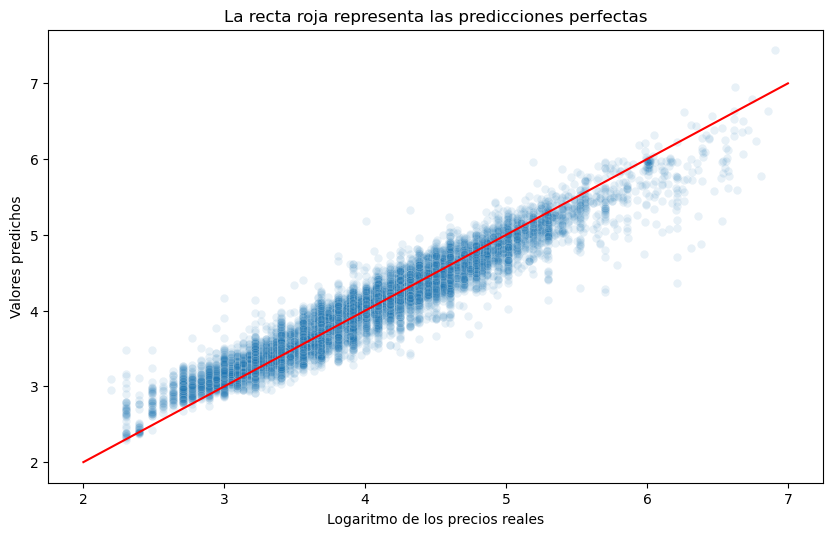

In [28]:
objetivo = list(list(np.array(y_train).reshape(1,-1))[0])

plt.figure(dpi=100, figsize=(10, 6))
sns.scatterplot(objetivo,list(Predicciones_train['Ensamblado ANN y ensamblado RF']),alpha=0.1)
plt.plot((2,7),(2,7),color='Red')

plt.title("La recta roja representa las predicciones perfectas")
plt.xlabel('Logaritmo de los precios reales')
plt.ylabel('Valores predichos')
plt.show()

Gráfico de las predicciones sobre el conjunto de test:

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


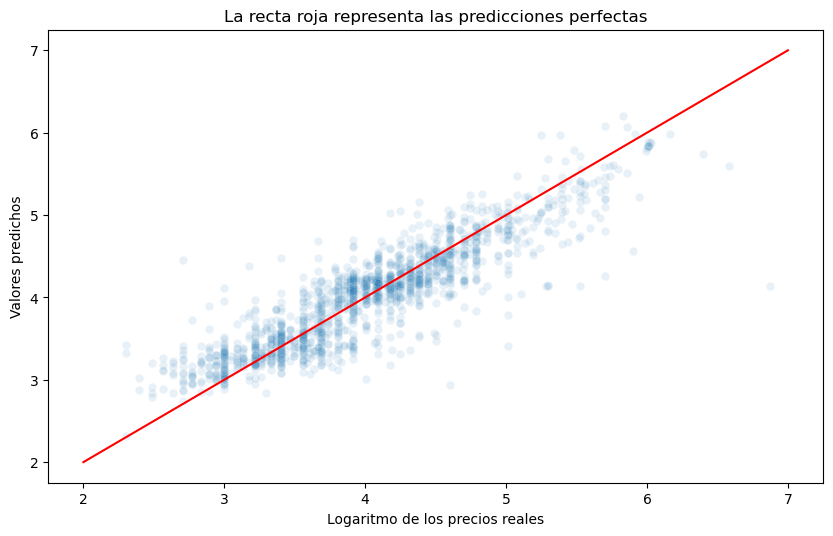

In [29]:
objetivo = list(list(np.array(y_test).reshape(1,-1))[0])

plt.figure(dpi=100, figsize=(10, 6))
sns.scatterplot(objetivo,list(Predicciones_test['Ensamblado ANN y ensamblado RF']),alpha=0.1)
plt.plot((2,7),(2,7),color='Red')

plt.title("La recta roja representa las predicciones perfectas")
plt.xlabel('Logaritmo de los precios reales')
plt.ylabel('Valores predichos')
plt.show()

### Ejemplo de sobreajuste

Una idea lógica podría ser ajustar una regresión a los valores predichos para mejorar el ajuste. Este método, en este caso particular, conduciría a un sobreajuste. Lo muestro:

Primero se crea el DataFrame a partir del cual se realizarán las predicciones:

In [30]:
Datos_Finales = pd.DataFrame(data=[])
Datos_Finales['Ensamblado ANN y ensamblado RF'] = Predicciones_train['Ensamblado ANN y ensamblado RF']
Datos_Finales['Intercept'] = np.ones(len(Predicciones_train['Ensamblado ANN y ensamblado RF']))
Datos_Finales.head()

,Ensamblado ANN y ensamblado RF,Intercept
0,4.128966,1.0
1,4.763089,1.0
2,3.392330,1.0
3,4.484216,1.0
4,3.175747,1.0


Se repite el proceso sobre el conjunto de test:

In [31]:
Datos_Finales_test = pd.DataFrame(data=[])
Datos_Finales_test['Ensamblado ANN y ensamblado RF'] = Predicciones_test['Ensamblado ANN y ensamblado RF']
Datos_Finales_test['Intercept'] = np.ones(len(Predicciones_test['Ensamblado ANN y ensamblado RF']))
Datos_Finales_test.head()

,Ensamblado ANN y ensamblado RF,Intercept
0,3.407691,1.0
1,2.856565,1.0
2,3.046353,1.0
3,5.327403,1.0
4,3.012605,1.0


Se entrena el modelo:

In [32]:
Modelo_Final = sm.OLS(y_train, Datos_Finales)
Resultados = Modelo_Final.fit()
print(Resultados.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                 1.598e+05
Date:                Thu, 02 Jun 2022   Prob (F-statistic):               0.00
Time:                        23:47:33   Log-Likelihood:                 2749.6
No. Observations:               13286   AIC:                            -5495.
Df Residuals:                   13284   BIC:                            -5480.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Ensamblado A

Se realizan las predicciones para train y test:

In [33]:
Predicción_final_train = Resultados.predict(Datos_Finales)

In [34]:
Predicción_final_test = Resultados.predict(Datos_Finales_test)

Gráfico de las predicciones sobre el conjunto de train:

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


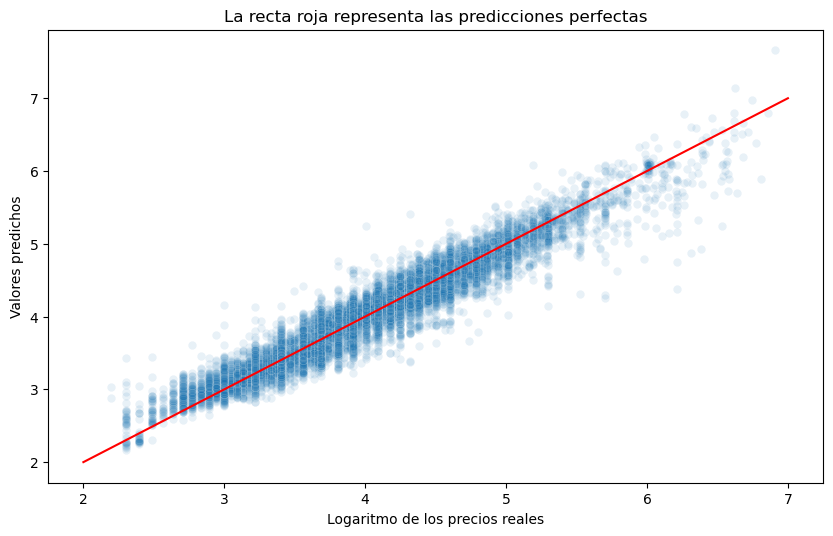

In [35]:
objetivo = list(list(np.array(y_train).reshape(1,-1))[0])

plt.figure(dpi=100, figsize=(10, 6))
sns.scatterplot(objetivo,list(Predicción_final_train),alpha=0.1)
plt.plot((2,7),(2,7),color='Red')

plt.title("La recta roja representa las predicciones perfectas")
plt.xlabel('Logaritmo de los precios reales')
plt.ylabel('Valores predichos')
plt.show()

Se ve visualmente que la predicción ha mejorado.

Gráfico de las predicciones sobre el conjunto de test:

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


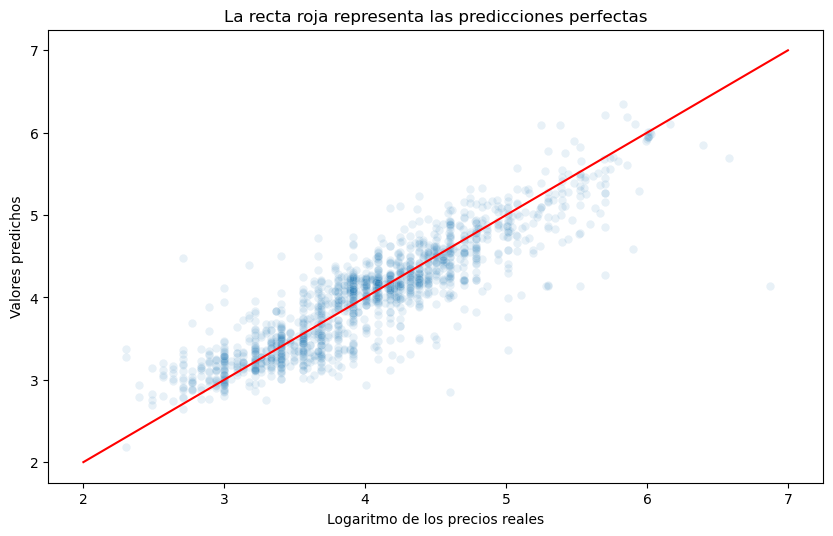

In [36]:
objetivo = list(list(np.array(y_test).reshape(1,-1))[0])

plt.figure(dpi=100, figsize=(10, 6))
sns.scatterplot(objetivo,list(Predicción_final_test),alpha=0.1)
plt.plot((2,7),(2,7),color='Red')

plt.title("La recta roja representa las predicciones perfectas")
plt.xlabel('Logaritmo de los precios reales')
plt.ylabel('Valores predichos')
plt.show()

En el caso del conjunto de test, no se observa mejoría.

Comparo los errores de este nuevo modelo con los errores del ensamblado de la red neuronal con el ensamblado de los dos modelos de Random Forest, que fue escojido como modelo final.

In [37]:
Errores_train

,Modelo,MSE,R2,MAE
0,Regresión,0.185961,0.416046,0.234210
1,Red Neuronal,0.067777,0.837977,0.152564
2,KNN,0.129341,0.623437,0.197256
3,Random Forest,0.027739,0.932133,0.088698
4,Random Forest con selección de variables,0.026564,0.936383,0.102655
5,Ensamblado de todos los modelos,0.061903,0.825995,0.144073
6,Ensamblado RF y RF_sel,0.026342,0.936116,0.094691
7,Ensamblado ANN y ensamblado RF,0.040602,0.900706,0.117691
8,"Ensamblado ANN, RF y RF_sel",0.034413,0.915782,0.108877


In [38]:
MSE_train(Predicción_final_train)

0.03870503085182218

El error sobre train ha bajado.

In [39]:
Errores_test

,Modelo,MSE,R2,MAE
0,Regresión,0.202348,0.396926,0.247914
1,Red Neuronal,0.119881,0.718740,0.190015
2,KNN,0.165820,0.532008,0.221785
3,Random Forest,0.116595,0.693870,0.186073
4,Random Forest con selección de variables,0.119273,0.699889,0.195646
5,Ensamblado de todos los modelos,0.120690,0.659871,0.199955
6,Ensamblado RF y RF_sel,0.115393,0.701524,0.187725
7,Ensamblado ANN y ensamblado RF,0.110704,0.722927,0.184698
8,"Ensamblado ANN, RF y RF_sel",0.110726,0.718761,0.184589


In [40]:
MSE_test(Predicción_final_test)

0.11213987274410106

Pero el error sobre test ha subido, provocando un sobreajuste.

En consecuencia, el modelo final sigue siendo el ensamblado de la red neuronal con el ensamblado de los dos modelos de Random Forest.

# Transformación de las predicciones de log(Price) a predicciones de Price

Luego el modelo final sería el ensamblado del ensamblado de los dos modelos de Random Forest y de la red neuronal, es decir:

$$ \frac{\frac{(Pred.Random.Forest.1) + (Predicción.Random.Forest.2)}{2} + Predicción.Red.Neuronal}{2}$$

Escrito de otra forma:

0.25*(Predicción del modelo de Random Forest con todas las variables)

*sumado a*

0.25*(Predicción del modelo de Random Forest con selección de variables)

*sumado a*

0.5*(Predicción de la red neuronal)

*es igual a*

Predicción Final

Esta es la predicción final de log('Price'), y para obtener la predicción del precio he de calcular la exponencial de esta predicción final:

In [41]:
Precio_predicho_train = np.exp(Predicciones_train['Ensamblado ANN y ensamblado RF'])

In [42]:
Precio_predicho_test = np.exp(Predicciones_test['Ensamblado ANN y ensamblado RF'])

Gráfico de las predicciones sobre el conjunto de train:

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


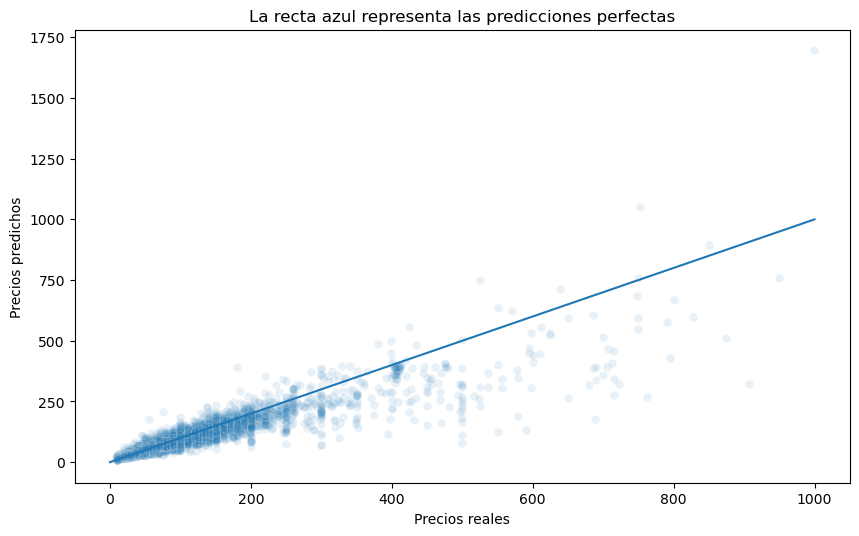

In [43]:
objetivo = list(list(np.array(y_train_original).reshape(1,-1))[0])

plt.figure(dpi=100, figsize=(10, 6))
sns.scatterplot(objetivo,list(Precio_predicho_train),alpha=0.1)
plt.plot((0, 1000), (0, 1000))

plt.title("La recta azul representa las predicciones perfectas")
plt.xlabel('Precios reales')
plt.ylabel('Precios predichos')
plt.show()

Gráfico de las predicciones sobre el conjunto de test:

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


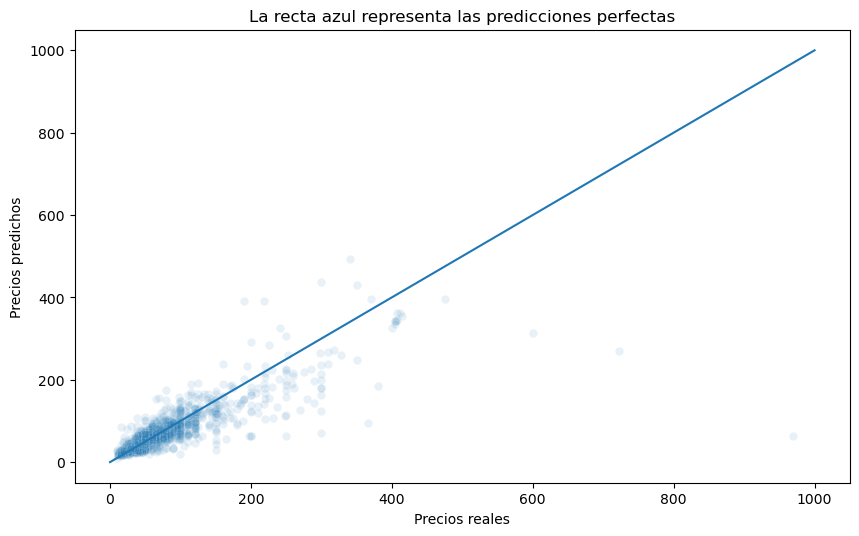

In [45]:
objetivo = list(list(np.array(y_test_original).reshape(1,-1))[0])

plt.figure(dpi=100, figsize=(10, 6))
sns.scatterplot(objetivo,list(Precio_predicho_test),alpha=0.1)
plt.plot((0, 1000), (0, 1000))

plt.title("La recta azul representa las predicciones perfectas")
plt.xlabel('Precios reales')
plt.ylabel('Precios predichos')
plt.show()

Se puede ver que hay precios extremadamente altos, que no son representativos del conjunto de precios de los pisos de Airbnb. Una opción de mejora sería haber eliminado estos pisos del dataset antes de empezar, para que no afecten a las predicciones, ya que son outliers y no son representativos de la totalidad de los pisos.

Ahora voy a calcular cual es el error porcentual en test, y a reflejarlo en un histograma:

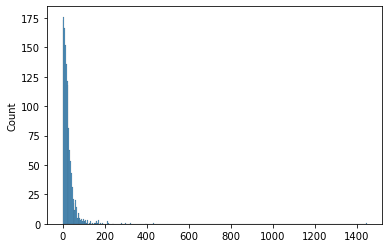

In [46]:
P = []
for n in range(len(objetivo)):
    P.append(abs(100*(objetivo[n]-list(Precio_predicho_test)[n]) / list(Precio_predicho_test)[n]))
sns.histplot(P)
plt.show()

Como la práctica totalidad de los datos están concentrados antes de 200, represento únicamente esta parte del histograma, para poder verla en más detalle:

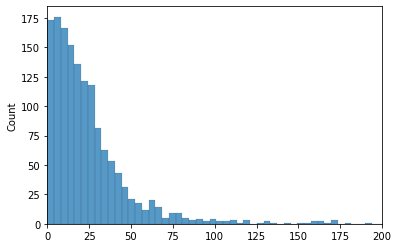

In [47]:
fig, ax = plt.subplots()
sns.histplot(P)
ax.set_xlim(0, 200)
plt.show()

Voy a calcular el error absoluto medio porcentual, MAPE:

In [48]:
np.mean(P)

26.803190768561745

Como el error absoluto medio porcentual se ve muy afectado por los outliers, una mejor opción es calcular el error absoluto mediano porcentual, que no se ve afectado por los outliers, siendo por ello más representativo que el error medio porcentual:

In [49]:
print(color.BOLD + "El error absoluto mediano porcentual es de",round(np.median(P),1),"%." + color.END)

El error absoluto mediano porcentual es de 18.2 %.
